In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,LogisticRegression
from sklearn.svm import SVC,SVR
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('avocado.csv')

In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


The above table shows the deatils of the avocado from the year 2015-2018 in United States.

Some relevant columns in the dataset:

    Date - The date of the observation
    AveragePrice - the average price of a single avocado
    type - conventional or organic
    year - the year
    Region - the city or region of the observation
    Total Volume - Total number of avocados sold
    4046 - Total number of avocados with PLU 4046 sold
    4225 - Total number of avocados with PLU 4225 sold
    4770 - Total number of avocados with PLU 4770 sold


PLU - The Product Lookup code

# Data Preparation and EDA

In [4]:
# Dropping Unnamed column
df=df.drop('Unnamed: 0',axis=1)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [5]:
# lets copy the above dataFrame into a new one for converting into categorical values
df1=df.copy()

We removed the Unnamed: 0 column because it consist of index which is not required here and the copy all the values to new dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


Here the columns of the dataset consist of different datatypes like int64,object,float64.

In [7]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [8]:
# Correlation
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


<AxesSubplot:>

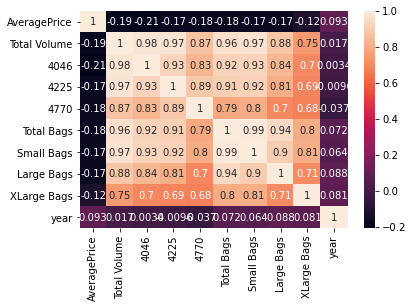

In [9]:
# Correlation Heatmap
sns.heatmap(df.corr(),annot=True)

The above heatmap displays lot of columns correlated with each other. We will look at it after Data Cleaning.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [11]:
# checking missing values
df.isnull().sum()


Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Its good we do not have null values

In [12]:
# Label Encoding for Region
label = LabelEncoder()
dicts = {}

label.fit(df.region.drop_duplicates()) 
dicts['region'] = list(label.classes_)
df1.region = label.transform(df1.region)

In [13]:
# Label Encoding for Type
label1 = LabelEncoder()
dicts = {}

label1.fit(df.type.drop_duplicates()) 
dicts['type'] = list(label1.classes_)
df1.type = label1.transform(df1.type)

In [14]:
# Checking for outliers
from scipy import stats
import numpy as np
var=['AveragePrice','Total Volume','4046','4225','4225','Total Bags','Small Bags','Large Bags','XLarge Bags','type','region']
z = np.abs(stats.zscore(df1[var]))
print(z)

[[0.18868864 0.22771641 0.23081597 ... 0.17557961 0.99983562 1.7002522 ]
 [0.13901962 0.23042664 0.23110251 ... 0.17557961 0.99983562 1.7002522 ]
 [1.18206895 0.21208462 0.23100731 ... 0.17557961 0.99983562 1.7002522 ]
 ...
 [1.15237477 0.24233073 0.2306933  ... 0.17557961 1.00016441 1.70081131]
 [1.30138182 0.24162464 0.2304279  ... 0.17557961 1.00016441 1.70081131]
 [0.53151208 0.24125273 0.22934712 ... 0.17557961 1.00016441 1.70081131]]


In [15]:
threshold=3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428]), array([2, 2, 8, ..., 0, 0, 0]))


In [16]:
df1=df[(z<3).all(axis=1)]

In [17]:
df.shape

(18249, 13)

In [18]:
# After Eliminating Outliners
df1.shape

(17707, 13)

<AxesSubplot:>

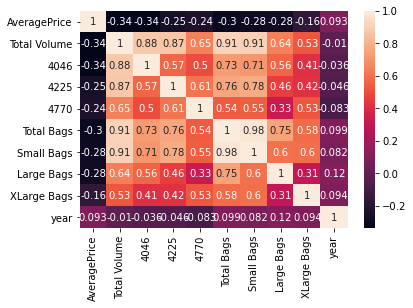

In [19]:
sns.heatmap(df1.corr(),annot=True) # heatmap after outliers elimination

Observations:-

1. Many columns are correlated with each other

2. Average price is correlated with type.

3. All size of the bags have correlatedwith other sizes of bags.

In [20]:
df1.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,17707.000000,1.770700e+04,1.770700e+04,1.770700e+04,17707.000000,1.770700e+04,1.770700e+04,17707.000000,17707.000000,17707.000000
mean,1.403880,4.747801e+05,1.593757e+05,1.704350e+05,12519.900231,1.324474e+05,1.027190e+05,28290.037864,1438.425366,2016.136104
std,0.386161,1.042682e+06,4.526053e+05,4.081618e+05,42441.154446,2.864266e+05,2.331016e+05,73493.695558,5508.640691,0.939789
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000
25%,1.110000,1.060725e+04,8.275700e+02,2.905215e+03,0.000000,4.994115e+03,2.766215e+03,114.555000,0.000000,2015.000000
50%,1.380000,1.015221e+05,7.894550e+03,2.717719e+04,167.150000,3.811792e+04,2.497194e+04,2471.490000,0.000000,2016.000000
75%,1.660000,3.977311e+05,9.988989e+04,1.309665e+05,5418.880000,1.030742e+05,7.891038e+04,19431.485000,80.000000,2017.000000
max,2.610000,8.362504e+06,4.085859e+06,3.894802e+06,718463.590000,2.782725e+06,2.348868e+06,781447.290000,55940.330000,2018.000000


### Data Visualisation

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

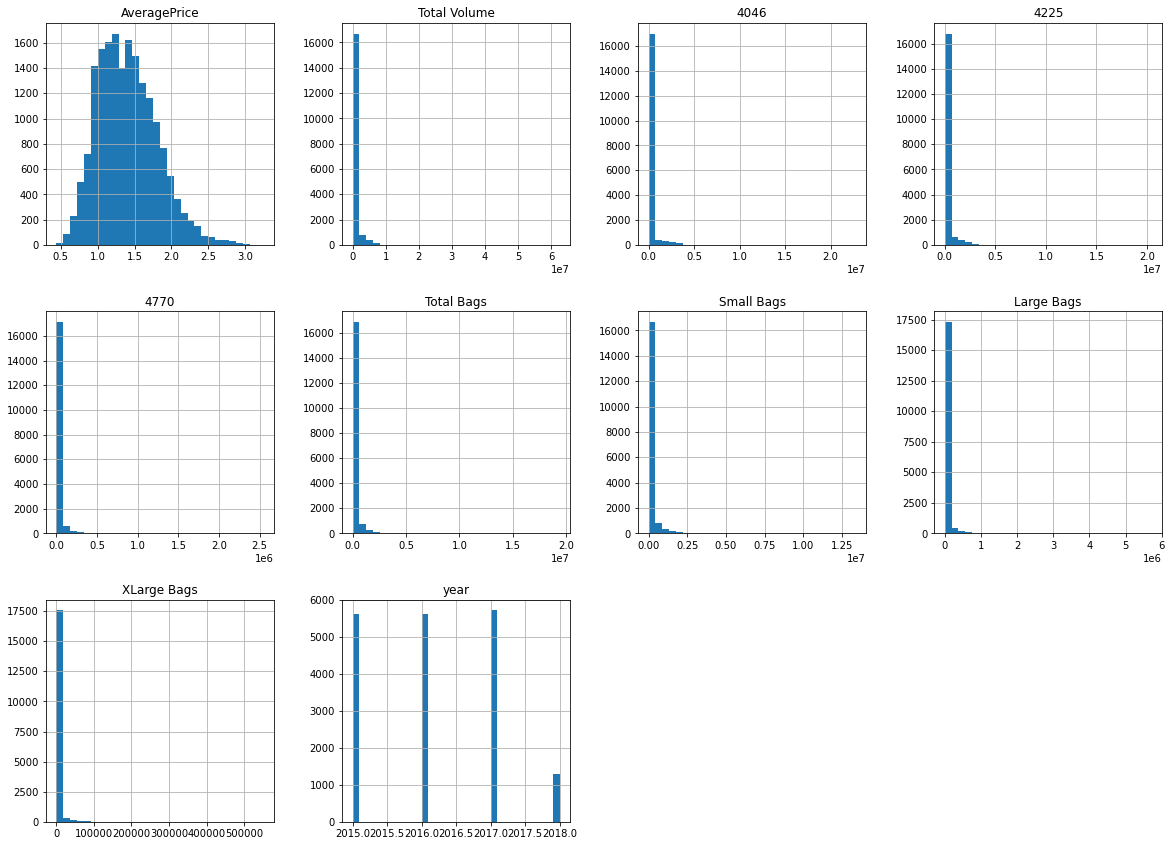

In [21]:
# histogram for Univariate analysis
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

In [22]:
# Cheking for Skewness
df1.skew()

AveragePrice    0.379466
Total Volume    3.702437
4046            4.841809
4225            4.313719
4770            6.546357
Total Bags      3.987548
Small Bags      4.148872
Large Bags      4.972424
XLarge Bags     5.952891
year            0.232747
dtype: float64

The final dataFrame will look like the above values and the original dataFrame will look like below values.

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

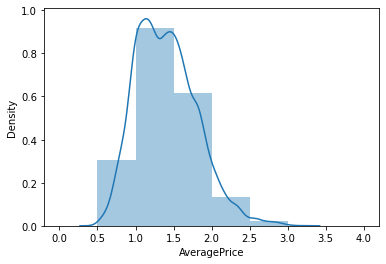

In [23]:
#plotting distplot to analyse most sale of Average price
sns.distplot(df['AveragePrice'], bins=(0,.5,1,1.5,2,2.5,3,3.5,4))

### Bivarient Analysis

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

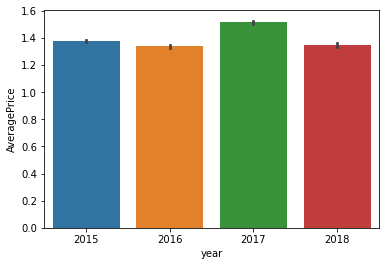

In [24]:
#Plotting bar Graph to compare Average Price
sns.barplot(x='year',y='AveragePrice',data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

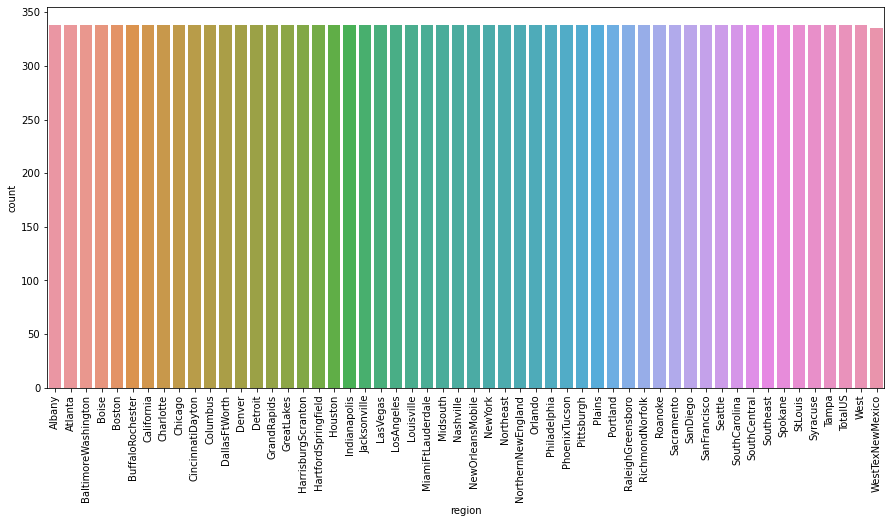

In [25]:
# Region Count plot
plt.figure(figsize=(15,7))
sns.countplot(df['region'])
plt.xticks(rotation=90)

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

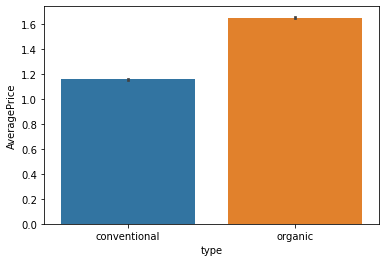

In [26]:
# type vs Average price
sns.barplot(x='type',y='AveragePrice',data=df)

(array([0, 1, 2, 3]),
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018')])

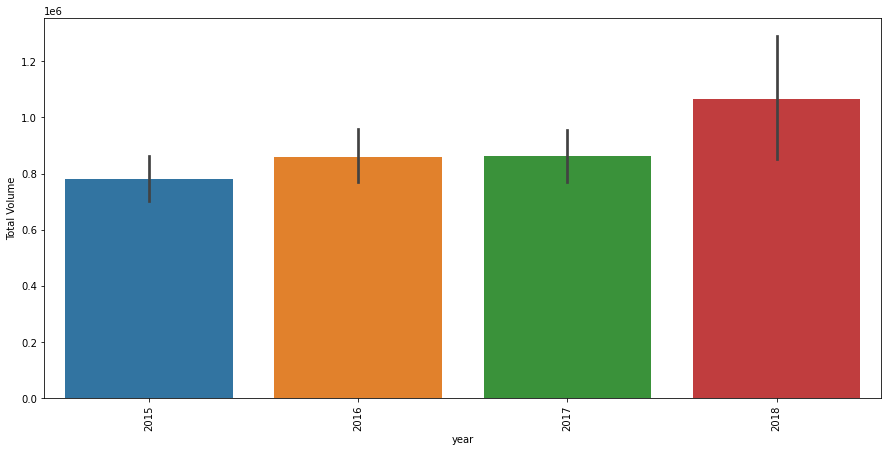

In [27]:
#Plotting bar Graph to compare sales of different years
plt.figure(figsize=(15,7))
sns.barplot(x='year', y='Total Volume', data=df)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='year', ylabel='Total Volume'>

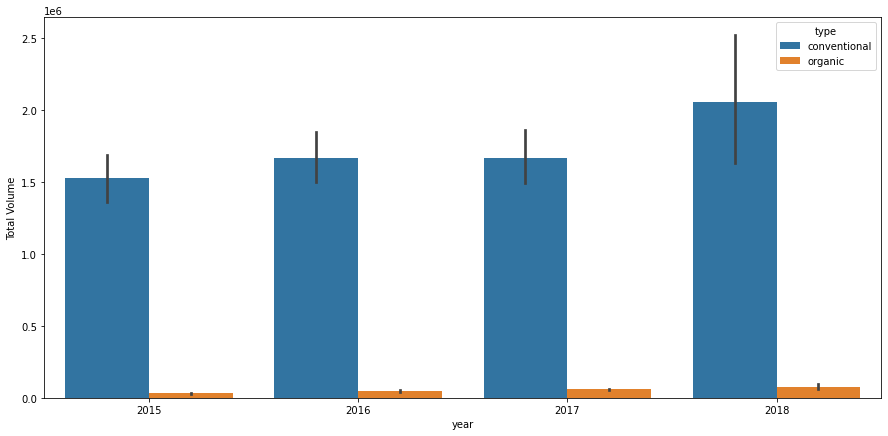

In [28]:
#Plotting bar plot to compare sales of type of avocado in different years
plt.figure(figsize=(15,7))
sns.barplot(x='year', y='Total Volume', data=df, hue='type')

<AxesSubplot:>

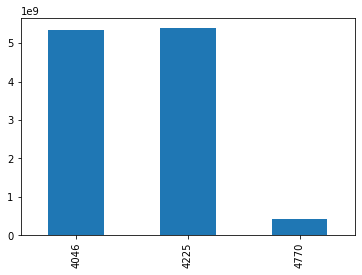

In [29]:
#Plotting bar plot to compare sales of different PLUs
df[['4046', '4225', '4770']].sum().plot.bar()

<AxesSubplot:>

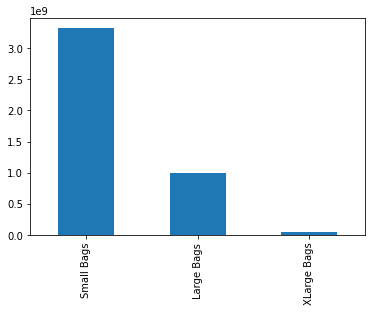

In [30]:
#Plotting bar plot to compare sales of different bags
df[['Small Bags', 'Large Bags', 'XLarge Bags']].sum().plot.bar()

In [31]:
df1

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


## Model Building

### Perdiction with Average price

In [32]:
# Label Encoding for Region
label = LabelEncoder()
dicts = {}

label.fit(df.region.drop_duplicates()) 
dicts['region'] = list(label.classes_)
df1.region = label.transform(df1.region)

# Label Encoding for Type
label1 = LabelEncoder()
dicts = {}

label1.fit(df.type.drop_duplicates()) 
dicts['type'] = list(label1.classes_)
df1.type = label1.transform(df1.type)

In [33]:
y=df1['AveragePrice']
x=df1.drop(['AveragePrice','Date'],axis=1)



In [34]:
scaler = StandardScaler()
scaler.fit(x)
scaler.transform(x)

array([[-0.39374916, -0.34984871, -0.28416038, ..., -1.01576783,
        -1.20892756, -1.69543121],
       [-0.40272592, -0.35064956, -0.30821044, ..., -1.01576783,
        -1.20892756, -1.69543121],
       [-0.3419739 , -0.3503835 , -0.15015379, ..., -1.01576783,
        -1.20892756, -1.69543121],
       ...,
       [-0.44215442, -0.34950584, -0.41156949, ...,  0.98447694,
         1.98336955,  1.74733662],
       [-0.43981572, -0.34876409, -0.41027523, ...,  0.98447694,
         1.98336955,  1.74733662],
       [-0.4385839 , -0.34574341, -0.41180631, ...,  0.98447694,
         1.98336955,  1.74733662]])

In [ ]:
model=[KNeighborsRegressor(),RandomForestRegressor(),DecisionTreeRegressor(),SVR(),LinearRegression()]
max_r2_score=0
for r_state in range(42,100):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=r_state)
    for i in model:
        i.fit(train_x,train_y)
        pre=i.predict(test_x)
        r2_sc=r2_score(test_y,pre)
        print("R2 Score corresponds to random state",r_state,'is',r2_sc)
        if r2_sc>max_r2_score:
            max_r2_score=r2_sc
            final_state=r_state
            final_model=i

print()
print()
print()
print()
print('Max R2 score corresponds to random state' ,final_state,'is',max_r2_score,'and final model is',final_model)

R2 Score corresponds to random state 42 is 0.6519486339216403
R2 Score corresponds to random state 42 is 0.8394306018331419
R2 Score corresponds to random state 42 is 0.6850722710614323
R2 Score corresponds to random state 42 is 0.3989349134143204
R2 Score corresponds to random state 42 is 0.40896479382005346
R2 Score corresponds to random state 43 is 0.664525930722971
R2 Score corresponds to random state 43 is 0.8431736114338202
R2 Score corresponds to random state 43 is 0.6783790527307381
R2 Score corresponds to random state 43 is 0.4302740116415885
R2 Score corresponds to random state 43 is 0.4187723860431539
R2 Score corresponds to random state 44 is 0.6433598493105258
R2 Score corresponds to random state 44 is 0.8276000852993943
R2 Score corresponds to random state 44 is 0.6532130696829647
R2 Score corresponds to random state 44 is 0.41350795739666535
R2 Score corresponds to random state 44 is 0.41313930144387045
R2 Score corresponds to random state 45 is 0.648497956257138
R2 Scor

The max R2 score corresponds to 65 and model selected is RandomForestRegressor() now we will hypertune the parameters for best performance

#### Hypertuning the parameters

In [ ]:
# Finding the best parameteres for best performance
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=final_state)
RNDR=RandomForestRegressor()
parameters={'max_depth':range(1,22)}
gridsearch=GridSearchCV(RNDR,parameters)
gridsearch.fit(train_x,train_y)
gridsearch.best_params_

#### Final regressor model

In [ ]:
# For Best Performance
RNDR=RandomForestRegressor(max_depth=22)
RNDR.fit(train_x,train_y)
predRNDR=RNDR.predict(test_x)
r2_scr=r2_score(test_y,predRNDR)
print(r2_scr)

The R2 score with the best performing parameters is R2 score. The model is performing vry good but we can check Mean absolute error and mean squared error to be sure

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('Mean absolute error:-',mean_absolute_error(test_y,predRNDR))
print('Mean squared error:-',mean_squared_error(test_y,predRNDR))

The mean absolute error as well mean squared error is also very low so it is good indication that the model is performing very good.

In [ ]:
# Cross validation score 
cvs1=cross_val_score(RNDR,train_x,train_y)
cvs1
cvs1.mean()

### Prediction with region

In [ ]:
# Loading Variable
yc=df['region']
xc=df.drop(['region','Date'],axis=1)

In [ ]:
# Scaling variable xc
scaler = StandardScaler()
scaler.fit(xc)
scaler.transform(xc)

In [ ]:
# testing best model
model=[KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),SVC()]
train_xc,test_xc,train_yc,test_yc=train_test_split(xc,yc,test_size=0.33,random_state=62)
for i in model:
    i.fit(train_xc,train_yc)
    predmodel=i.predict(test_xc)
    Ac=accuracy_score(test_yc,predmodel)
    print(i,Ac)
    

In [ ]:
# Final Model
RNDC=RandomForestClassifier(max_depth=22)
RNDC.fit(train_xc,train_yc)
predRNDC=RNDC.predict(test_xc)
print('Accuracy Score',accuracy_score(test_yc,predRNDC))
print('Classification report',classification_report(test_yc,predRNDC))
print('Confusion Matrix',confusion_matrix(test_yc,predRNDC))

In [ ]:
# Cross validation score 
cvs=cross_val_score(RNDC,train_xc,train_yc)
cvs
cvs.mean()

### Conclusion

1. For Average price prediction we used Random Forest Regressor.

2. For Region prediction we used Random Forest Classifier

3. Cross val score of regression shows that the model is not overfitted.

4. Cross val score of classification shows that the model is not overfitted.

### Saving the model

In [ ]:
# Saving Regression model
import joblibs
joblibs.dump(RNDR,'Avocado_regression')

In [ ]:
# Saving Classification model
joblibs.dump(RNDC,'Avocado_classification')